In [2]:
import pandas as pd
import os
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Objectives

This notebook file is meant to give the analysts a very quick view on what dataset they will be analyzing, what key features does the dataset perform, what are the essential events and how are they distributed and a few other key aspects digital marketing analyst/product analyst would definitely spend time investigating.

**NOTE:** The dataset is from Kaggle - a website that provides diversity and quality datasets. You could asess the dataset's source at following direction: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/data

In [2]:
parquet_path = r'C:\Users\catth\OneDrive\Documents\Data\2020-Apr.parquet'
data = pd.read_parquet(parquet_path)

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66589268 entries, 0 to 66589267
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int32              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float32            
 7   user_id        int32              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float32(1), int32(2), int64(1), object(4)
memory usage: 3.7+ GB


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00+00:00,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.380005,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01+00:00,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.670044,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01+00:00,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.050049,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02+00:00,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.339966,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03+00:00,view,9500109,2232732104175649385,apparel.scarf,defender,25.049999,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


In [4]:
data.iloc[0].keys()

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

There are total 9 columns and 66589268 rows in the dataset that show information about event time, event types, product id, category id and code, brand name, price of each user's id and session.

* event_time:	Time when event happened at (in UTC).
* event_type:	Only one kind of event: purchase.
* product_id:	ID of a product
* category_id:	Product's category ID
* category_code:	Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.
* brand:	Downcased string of brand name. Can be missed.
* price:	Float price of a product. Present.
* user_id	Permanent user ID.
* user_session:	Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

In [4]:
data.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    6755873
brand            8992487
price                  0
user_id                0
user_session         109
dtype: int64

Those null values in category_code and brand columns will get filled with mapping solution, but null values in user_session need to dropped since they are not significant.

In [11]:
category_map = (
    data.loc[data['category_code'].notna()]
        .drop_duplicates('category_id')[['category_id', 'category_code']]
        .set_index('category_id')['category_code']
        .to_dict()
)

In [4]:
brand_map = (
    data[['product_id', 'brand']]
    .dropna()
    .groupby('product_id')['brand']
    .first()
    .to_dict()
)

In [12]:
data['category_code'] = data.apply(
    lambda row: category_map[row['category_id']] if pd.isna(row['category_code']) and row['category_id'] in category_map else row['category_code'], 
    axis=1
)

In [ ]:
data['brand'] = data.apply(
    lambda row: brand_map[row['product_id']] if pd.isna(row['brand']) and row['product_id'] in brand_map else row['brand'], 
    axis=1
)

In [5]:
data = data.dropna(subset=['user_session'])

In [6]:
data.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

# Overall view

In [6]:
print("\nTime range of the data:")
print(f"Start Time: {data['event_time'].min()}")
print(f"End Time: {data['event_time'].max()}")


Time range of the data:
Start Time: 2020-04-01 00:00:00+00:00
End Time: 2020-04-30 23:59:59+00:00


It is a small range of time, so it won't be affected by factors like holidays, discount seasons, or other special events. Therefore, this dataset can provide a more neutral and consistent view of user behavior in a day. It helps us isolate organic shopping patterns, making it easier to identify natural consumer preferences, product popularity, and purchasing funnels without external bias.

Sort data by user id and session for later analyst.

In [8]:
data = data.sort_values(by=['user_id', 'user_session', 'event_time'])

In [9]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
14773921,2020-04-10 04:21:00+00:00,view,100000644,2232732081585127530,construction.components.faucet,None,1172.180054,27396220,d3b5d32d-f8cf-44f7-ad25-28c0229767e9
20996416,2020-04-13 04:33:01+00:00,view,1801883,2232732099754852875,appliances.personal.massager,philips,257.380005,29515875,0b91aa1b-f1ac-4903-9562-8268d22db35b
21024806,2020-04-13 04:51:51+00:00,view,1801766,2232732099754852875,appliances.personal.massager,artel,167.210007,29515875,0b91aa1b-f1ac-4903-9562-8268d22db35b
23083860,2020-04-14 02:20:44+00:00,view,100083252,2232732101407408685,apparel.shoes.slipons,lenovo,179.899994,29515875,2a417b3a-55ea-4271-b80a-2e0592278b7f
45490335,2020-04-23 04:50:24+00:00,view,100044764,2232732101407408685,apparel.shoes.slipons,prestigio,97.559998,29515875,70c0f021-4283-458b-b50a-6c8ecefa096e


## Event types

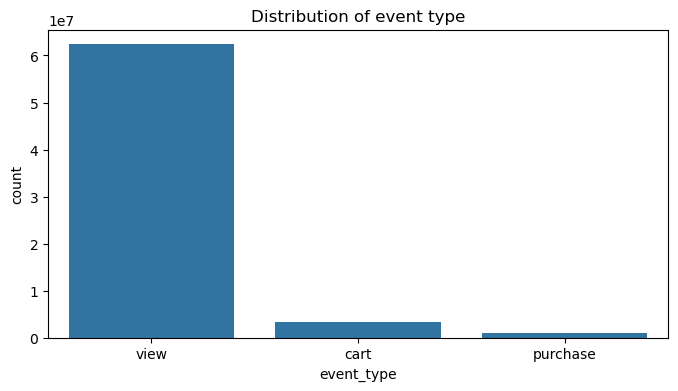

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='event_type', order=data['event_type'].value_counts().index)
plt.title("Distribution of event type")
plt.show()

The event type is including **view**, (putting products in) **cart**, **purchase** of users. It's seem like users are more interesting in viewing and putting products in cart more than purchasing them.  

In [ ]:
view_sessions = data[data['event_type'] == 'view']['user_session'].unique()
purchase_sessions = data[data['event_type'] == 'purchase']['user_session'].unique()

view_and_buy_sessions = set(view_sessions).intersection(set(purchase_sessions))
view_only_sessions = set(view_sessions) - set(purchase_sessions)

num_view_and_buy = len(view_and_buy_sessions)
num_view_only = len(view_only_sessions)

Number of sessions with view and subsequent purchase: 784376
Number of sessions with view but no purchase: 10851459
Conversion rate from view sessions: 6.74%


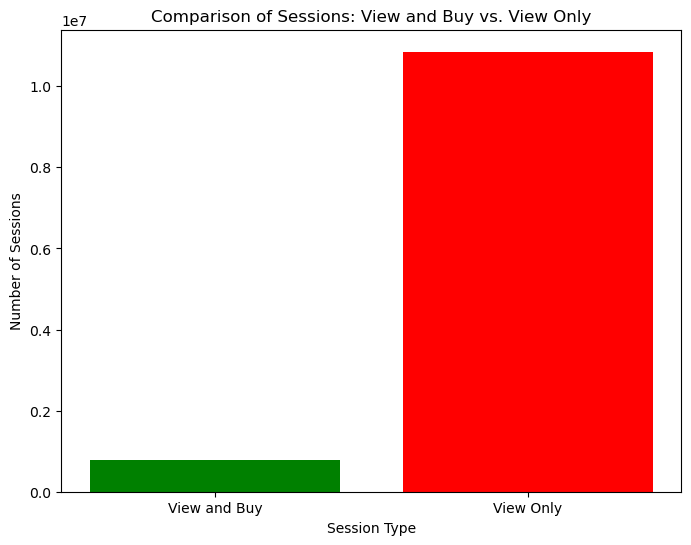

In [9]:
print(f"Number of sessions with view and subsequent purchase: {num_view_and_buy}")
print(f"Number of sessions with view but no purchase: {num_view_only}")

total_view_sessions = len(view_sessions)
if total_view_sessions > 0:
    conversion_rate_from_view = (num_view_and_buy / total_view_sessions) * 100
    print(f"Conversion rate from view sessions: {conversion_rate_from_view:.2f}%")
else:
    print("No view sessions found.")

plt.figure(figsize=(8, 6))
plt.bar(['View and Buy', 'View Only'], [num_view_and_buy, num_view_only], color=['green', 'red'])
plt.title('Comparison of Sessions: View and Buy vs. View Only')
plt.xlabel('Session Type')
plt.ylabel('Number of Sessions')
plt.show()

In [10]:
data['user_brand'] = data['user_id'].astype(str) + '_' + data['brand'].astype(str)
user_brand_purchase = data[data['event_type'] == 'purchase']['user_brand'].unique()
data['previously_purchased_brand'] = data['user_brand'].isin(user_brand_purchase).astype(int)

In [11]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_brand,previously_purchased_brand
1,2020-04-13 04:33:01+00:00,view,1801883,2232732099754852875,appliances.personal.massager,philips,257.380005,29515875,0b91aa1b-f1ac-4903-9562-8268d22db35b,29515875_philips,0
2,2020-04-13 04:51:51+00:00,view,1801766,2232732099754852875,appliances.personal.massager,artel,167.210007,29515875,0b91aa1b-f1ac-4903-9562-8268d22db35b,29515875_artel,0
3,2020-04-14 02:20:44+00:00,view,100083252,2232732101407408685,apparel.shoes.slipons,lenovo,179.899994,29515875,2a417b3a-55ea-4271-b80a-2e0592278b7f,29515875_lenovo,0
4,2020-04-23 04:50:24+00:00,view,100044764,2232732101407408685,apparel.shoes.slipons,prestigio,97.559998,29515875,70c0f021-4283-458b-b50a-6c8ecefa096e,29515875_prestigio,0
5,2020-04-23 04:54:40+00:00,view,1201256,2232732101407408685,apparel.shoes.slipons,huawei,192.770004,29515875,70c0f021-4283-458b-b50a-6c8ecefa096e,29515875_huawei,0


## Prices

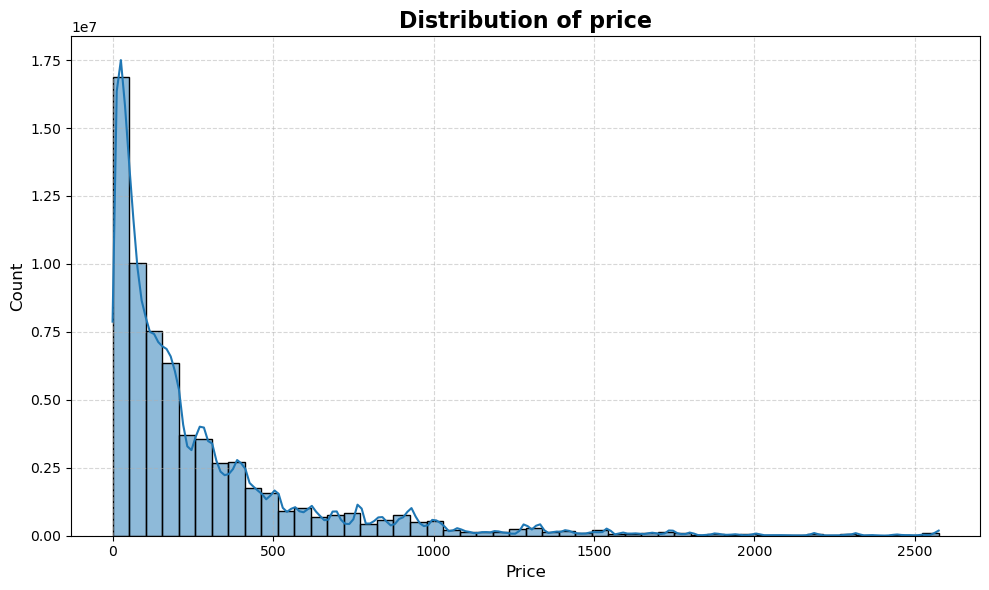

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='price', bins=50, kde=True)

plt.title('Distribution of price', fontsize=16, weight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

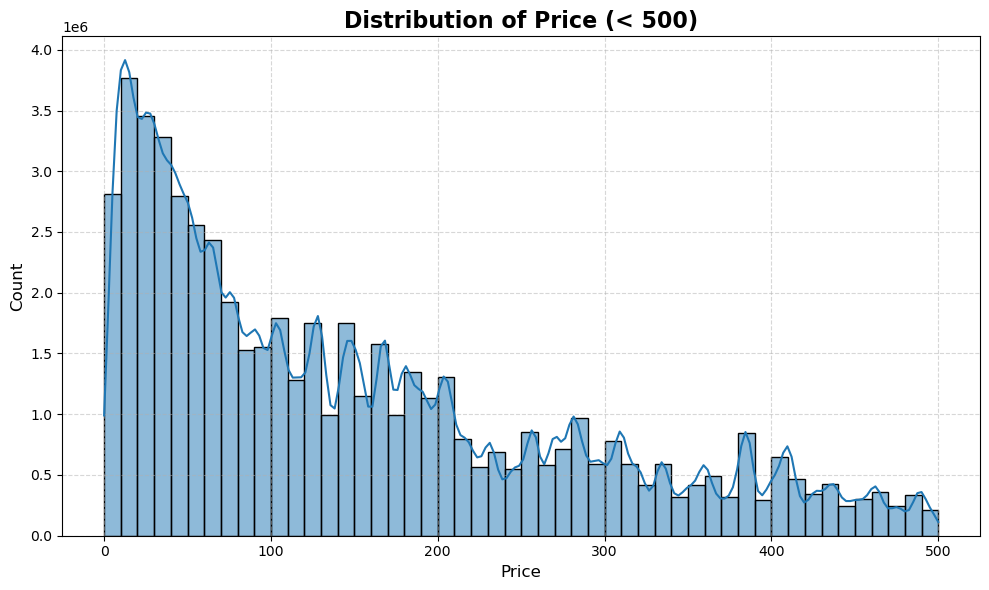

In [11]:
plt.figure(figsize=(10, 6))

filtered_data = data[data['price'] < 500]

sns.histplot(data=filtered_data, x='price', bins=50, kde=True)

plt.title('Distribution of Price (< 500)', fontsize=16, weight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Brands

In [ ]:
# check brand
brand = data[['brand']]
print(brand['brand'].value_counts())

There are total 1092 difference brands in the dataset. And a lot of them only have 1 session contributed in the dataset. So we just need to have a look of those who have more than 1000 sessions.

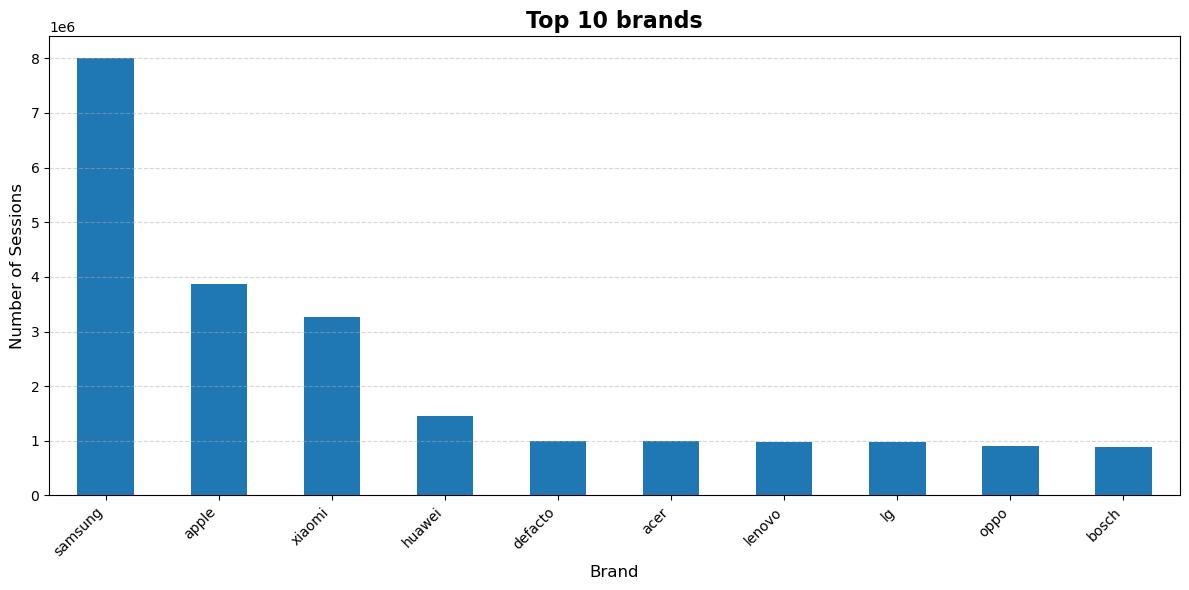

In [39]:
plt.figure(figsize=(12, 6))

popular_brands = brand['brand'].value_counts().head(10)
popular_brands.plot(kind='bar')
plt.title('Top 10 brands', fontsize=16, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Samsung is the most popular here, we could see than it is twice as high as Apple brand which is in the second place.

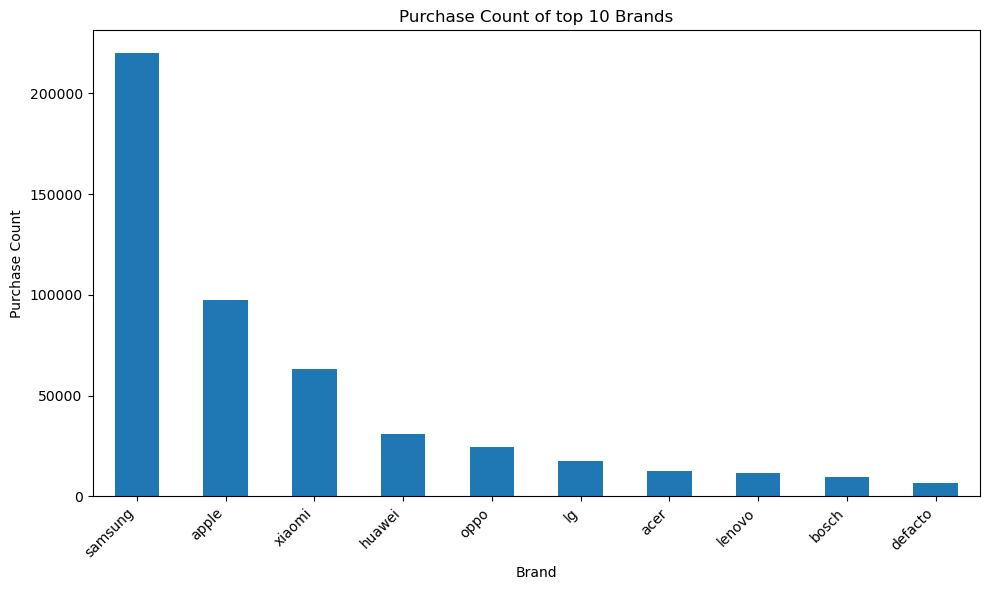

In [38]:
plt.figure(figsize=(10, 6))

purchases = data[(data['event_type'] == 'purchase') & (data['brand'].isin(popular_brands.index))]
purchase_counts = purchases['brand'].value_counts()

purchase_counts.plot(kind='bar')
plt.title('Purchase Count of top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Samsung still highest in purchasing and the rest is mess up a little bit in order but not much.

## Category_code

In [15]:
# check category_code
category_code = data[['category_code']]
print(category_code['category_code'].value_counts())
print(category_code['category_code'].isnull().sum())

category_code
construction.tools.light            14264275
electronics.audio.headphone          3198405
appliances.personal.massager         2371602
sport.bicycle                        2009254
appliances.kitchen.refrigerators     1849877
                                      ...   
appliances.kitchen.steam_cooker          278
stationery.paper                          91
country_yard.watering                     45
computers.components.sound_card           39
apparel.belt                              16
Name: count, Length: 140, dtype: int64
0


There are 140 distince type of products. They are listed as 'category'.('use purpose').'product's name'. Therefor, i will try to group them by category.

In [16]:
data['main_category'] = data['category_code'].apply(lambda x: str(x).split('.')[0] if pd.notna(x) else None)

main_category = []
for i in range(len(data)):
    main_category.append(data.iloc[i].get("main_category",None))
main_category = pd.DataFrame({"main_category":main_category})
print(main_category["main_category"].value_counts())
print(main_category.isnull().sum())

main_category
construction    16290170
appliances      13104346
electronics      6687568
apparel          5974511
sport            3013045
furniture        2761891
computers        1730724
kids             1572382
accessories       564632
auto              292702
country_yard      284253
stationery         29828
medicine           28195
Name: count, dtype: int64
main_category    0
dtype: int64


That's better, now it is 13 different product types thus will be easier for analyse

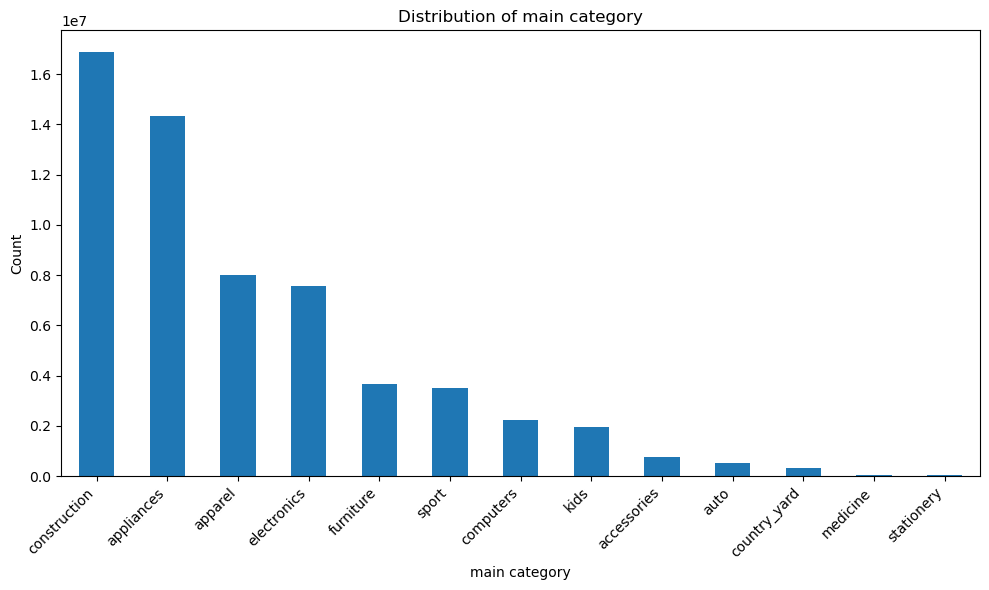

In [18]:
plt.figure(figsize=(10, 6))
main_category['main_category'].value_counts().plot(kind='bar')
plt.title('Distribution of main category')
plt.xlabel('main category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preparing

In [17]:
data['event_time'] = pd.to_datetime(data['event_time'], utc=True)
data['hour'] = data['event_time'].dt.hour

In [18]:
data['label'] = (data['event_type'] == 'purchase').astype(int)

In [19]:
df_selected = data[['category_code', 'brand', 'price', 'hour', 'label', 'previously_purchased_brand']]

parquet_path = r'C:\Users\catth\OneDrive\Documents\Data\df_selected.parquet'
df_selected.to_parquet(parquet_path, index=False)